# Работа с Excel

Материалы:
* Макрушин С.В. Лекция 7: Работа с Excel
* https://docs.xlwings.org/en/stable/quickstart.html
* https://nbviewer.jupyter.org/github/pybokeh/jupyter_notebooks/blob/master/xlwings/Excel_Formatting.ipynb#search_text


## Задачи для совместного разбора

1. На листе "Рецептура" файла `себестоимостьА_в1.xlsx` для области "Пшеничный хлеб" рассчитать себестоимость всех видов продукции.

2. Результаты расчетов 1.1 сохранить в отдельном столбце области "Пшеничный хлеб"

In [ ]:
#pip install xwings

In [2]:
import xlwings as xw

In [3]:
wb = xw.Book(r'C:\Users\Ольга\Desktop\ДПИ\data\себестоимостьА_в1.xlsx')

xw.Range("T7:T10").formula = '=SUMPRODUCT(G7:O7,G$14:O$14)'
xw.Range('T4').value = 'Себестоимость'
xw.Range('T4').columns[0].autofit()
xw.Range('T7:T10').value

[21.48, 16.525, 17.423000000000002, 18.085]

3. Приблизить форматирование столбца, добавленного в задаче 2 к оформлению всей области.

In [10]:
#from appscript import k

In [4]:
xw.Range('T4:T6').merge(across=False)
xw.Range('S3:T3').merge(across=False)



xw.Range('T4').color = (245, 192, 0)
xw.Range('T7:T10').color = (255, 255, 167)
xw.Range('T4').api.HorizontalAlignment = xw.constants.HAlign.xlHAlignCenter
xw.Range('T4').api.VerticalAlignment = xw.constants.HAlign.xlHAlignCenter

xw.Range('T4').font.color = "#ffffff"
xw.Range('T4').font.bold = True

xw.Range('T4:T11').api.Borders.Weight = 2
xw.Range('T4:T10').api.Borders.Weight = 2


4. Выполнить 3 с помощью "протягиваемых" формул.

In [5]:
xw.Range('T7:T10').color = (255, 255, 167)  #цвет заливки 
xw.Range('T4:T11').api.Borders.Weight = 2  #толщина границ для всего столбца
xw.Range('T4:T10').api.Borders.Weight = 2

## Лабораторная работа 7.1

1. Загрузите данные из файлов `reviews_sample.csv` (__ЛР2__) и `recipes_sample.csv` (__ЛР5__) в виде `pd.DataFrame`. Обратите внимание на корректное считывание столбца(ов) с индексами. Оставьте в таблице с рецептами следующие столбцы: `id`, `name`, `minutes`, `submitted`, `description`, `n_ingredients`

In [ ]:
pip install pandas

In [ ]:
pip install numpy

In [6]:

import numpy as np
import pandas as pd

In [8]:
recipes = pd.read_csv(
    r'C:\Users\Ольга\Desktop\ДПИ\data\recipes_sample.csv', 
    delimiter=',', 
    usecols=['id', 'name', 'minutes', 'submitted', 'description', 'n_ingredients']
)
reviews = pd.read_csv(r'C:\Users\Ольга\Desktop\ДПИ\data\reviews_sample.csv', delimiter=',', index_col=0)
recipes

,name,id,minutes,submitted,description,n_ingredients
0,george s at the cove black bean soup,44123,90,2002-10-25,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,2003-07-26,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,2002-08-29,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,2002-07-27,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,2004-02-23,i think a fondue is a very romantic casual din...,NaN
...,...,...,...,...,...,...
29995,zurie s holey rustic olive and cheddar bread,267661,80,2007-11-25,this is based on a french recipe but i changed...,10.0
29996,zwetschgenkuchen bavarian plum cake,386977,240,2009-08-24,"this is a traditional fresh plum cake, thought...",11.0
29997,zwiebelkuchen southwest german onion cake,103312,75,2004-11-03,this is a traditional late summer early fall s...,NaN
29998,zydeco soup,486161,60,2012-08-29,this is a delicious soup that i originally fou...,NaN


2. Случайным образом выберите 5% строк из каждой таблицы и сохраните две таблицы на разные листы в один файл `recipes.xlsx`. Дайте листам названия "Рецепты" и "Отзывы", соответствующие содержанию таблиц. 

In [ ]:
pip install xlsxwriter


In [9]:
recipes_5 = recipes.iloc[np.random.choice(len(recipes), int(len(recipes)*0.05), replace=False)]
reviews_5 = reviews.iloc[np.random.choice(len(reviews), int(len(reviews)*0.05), replace=False)]

writer = pd.ExcelWriter('./recipes.xlsx', engine='xlsxwriter')

recipes_5.to_excel(writer, sheet_name='Рецепты', index=False)
reviews_5.to_excel(writer, sheet_name='Отзывы')

writer.close()

reviews_5

,user_id,recipe_id,date,rating,review
303631,58038,96181,2005-04-25,4,Great taste and easy to prepare. It was a nic...
707570,1680722,458915,2012-03-12,5,This is much better as my version of pineapple...
663569,172861,32237,2010-04-29,4,This was good and I liked that it was easier t...
515007,685701,9110,2009-02-02,5,very good had to sub the tomato paste with tom...
321106,111291,227311,2007-09-16,5,These are awesome sandwiches. Served them at ...
...,...,...,...,...,...
826022,35794,36784,2005-07-10,4,I did half a recipe and used the full can of s...
933814,341170,225529,2008-04-25,5,"Perfect! I've made this many times, but with b..."
1015109,20754,35524,2005-08-23,5,We absolutely loved this dish! Great change f...
298679,61660,181723,2008-01-25,5,All my favorite things in this casserole. I u...


3. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_assign`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи присваивания массива значений диапазону ячеек.

In [12]:
wb = xw.Book('recipes.xlsx')
sht = wb.sheets['Рецепты']

sht.range('G1').value = 'seconds_assign'

seconds = np.array(sht.range('C2:C1501').value)*60

sht.range('G2').options(transpose=True).value = seconds

4. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_formula`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи формул Excel.

In [16]:
wb = xw.Book('recipes.xlsx')
sht = wb.sheets['Рецепты']
sht.range('H1').value = 'second_formula'
sht.range('H2:H1501').formula = '=C2 * 60'
sht.range('H2:H1501').options(numbers=int).value  
sht.range('H4').columns[0].autofit()
result = sht.range('H1:H10').value
print(result)


['second_formula', 420.0, 2100.0, 1200.0, 1500.0, 4500.0, 1200.0, 1200.0, 1680.0, 1800.0]


5. Сделайте названия всех добавленных столбцов полужирными и выровняйте по центру ячейки.

In [17]:
sht.range('G1:H1').api.Font.Bold = True  # жирным
sht.range('A1:H1').api.HorizontalAlignment = -4108  # по центру
sht.range('D1:H1').columns[0].autofit()


6. Раскрасьте ячейки столбца `minutes` в соответствии со следующим правилом: если рецепт выполняется быстрее 5 минут, то цвет - зеленый; от 5 до 10 минут - жёлтый; и больше 10 - красный.

In [18]:
import xlwings as xw
wb = xw.Book('recipes.xlsx')
sht = wb.sheets['Рецепты']
minutes_column = sht.range('C2:C1501')
# не совсем поняла, когда зеленый цвет, поэтому использовала зеленый, когда минуты = 5, желтый 5<минут<10, красный от 10 минут
for cell in minutes_column:
    minutes = cell.value
    if minutes == 5:
        cell.color = (0, 255, 0)  # Зеленый
    elif 5 < minutes <= 10:
        cell.color = (255, 255, 0)  # Желтый
    else:
        cell.color = (255, 0, 0)  # Красный


7. Добавьте на лист `Рецепты`  столбец `n_reviews`, содержащий кол-во отзывов для этого рецепта. Выполните задание при помощи формул Excel.

In [21]:
sht_reviews = wb.sheets['Отзывы']

sht.range('I1').value = 'n_reviews'
sht.range('I2:I1501').formula = '=COUNTIF(Отзывы!C:C,B2)'
sht.range('G1:I1').api.Font.Bold = True  # жирным
sht.range('A1:I1').api.HorizontalAlignment = -4108  # по центру
sht.range('D1:I1').columns[0].autofit()

## Лабораторная работа 7.2

8. Напишите функцию `validate()`, которая проверяет соответствие всех строк из листа `Отзывы` следующим правилам:
    * Рейтинг - это число от 0 до 5 включительно
    * Соответствующий рецепт имеется на листе `Рецепты`
    
В случае несоответствия этим правилам, выделите строку красным цветом

In [38]:
def validate(rating, id_review, recipe_id_set):
    return (rating <= 0 or rating >= 5) and id_review not in recipe_id_set

recipe_id_set = sht.range('B2:B1501').value

for i in range(2, 1502):
    if validate(sht_reviews.range(f'E{i}').value, sht_reviews.range(f'C{i}').value, recipe_id_set):
        sht_reviews.range(f'B{i}:F{i}').color = (255, 0, 0)


9. В файле `recipes_model.csv` находится модель данных предметной области "рецепты". При помощи пакета `csv` считайте эти данные. При помощи пакета `xlwings` запишите данные на лист `Модель` книги `recipes_model.xlsx`, начиная с ячейки `A2`, не используя циклы. Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука. 

In [33]:
import csv
with open(r'C:\Users\Ольга\Desktop\ДПИ\recipes_model.csv', newline='', encoding='UTF-8') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t')
    data = list(reader)
#wb = xw.Book('recipes_model.xlsx')
wb = xw.Book()
wb.sheets.add('Модель')
wb.save('recipes_model.xlsx')
sheet = wb.sheets['Модель']
sheet.range('A2').value = data
#
wb.save()

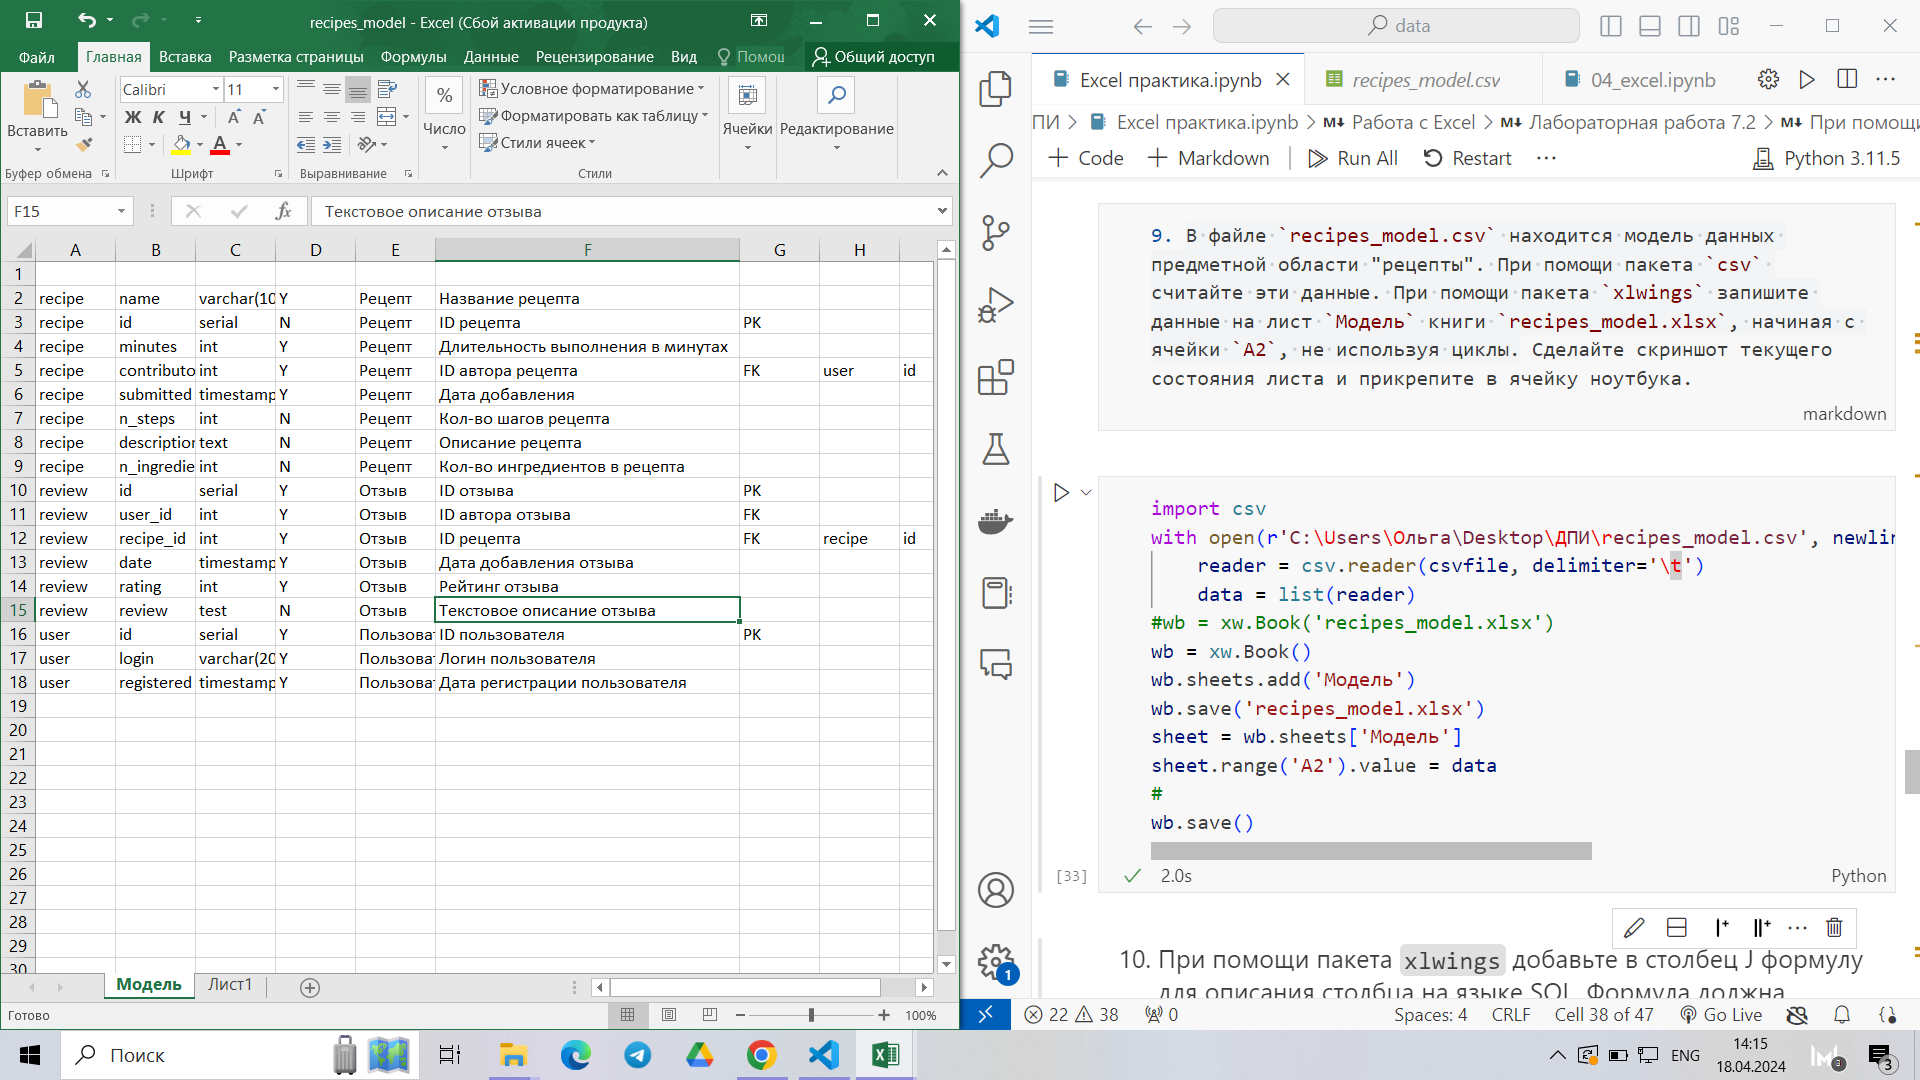

10. При помощи пакета `xlwings` добавьте в столбец J формулу для описания столбца на языке SQL. Формула должна реализовывать следующую логику:

    1\. в начале строки идут значения из столбцов В и C (значение столбца С приведено к верхнему регистру), разделенные пробелом
    
    2\. далее идут слова на основе столбца "Ключ"
        2.1 если в столбце "Ключ" указано значение "PK", то дальше через пробел идет ключевое слово "PRIMARY KEY"
        2.2 если в столбце "Ключ" указано значение "FK", то дальше через пробел идет ключевое слово "REFERENCES", затем значения столбцов H и I в формате "название_таблицы(название_столбца)"
        
    3\. если в столбце "Обязательно к заполнению" указано значение "Y" и в столбце "Ключ" указано не "PK", то дальше через пробел идет ключевое слово "NOT NULL".

Заполните этой формулой необходимое количество строк, используя "протягивание". Количество строк для протягивания определите на основе данных.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [40]:
import xlwings as xw
wb = xw.Book('recipes_model.xlsx')
ws = wb.sheets['Модель']
num_rows = ws.range('A1').expand('down').rows.count

formula = (
    '=$B2&" "&UPPER($C2)'
    '& IF($G2="PK"," PRIMARY KEY",'
    ' IF($G2="FK"," REFERENCES "&$H2&"("&$I2&")", ""))'
    '& IF($D2="Y", IF($G2<>"PK"," NOT NULL",""), "")'
)

ws.range('J2').formula = formula
ws.range('J2').copy()
ws.range(f'J2:J{num_rows}').paste()
ws.range('J:J').autofit()
wb.save()



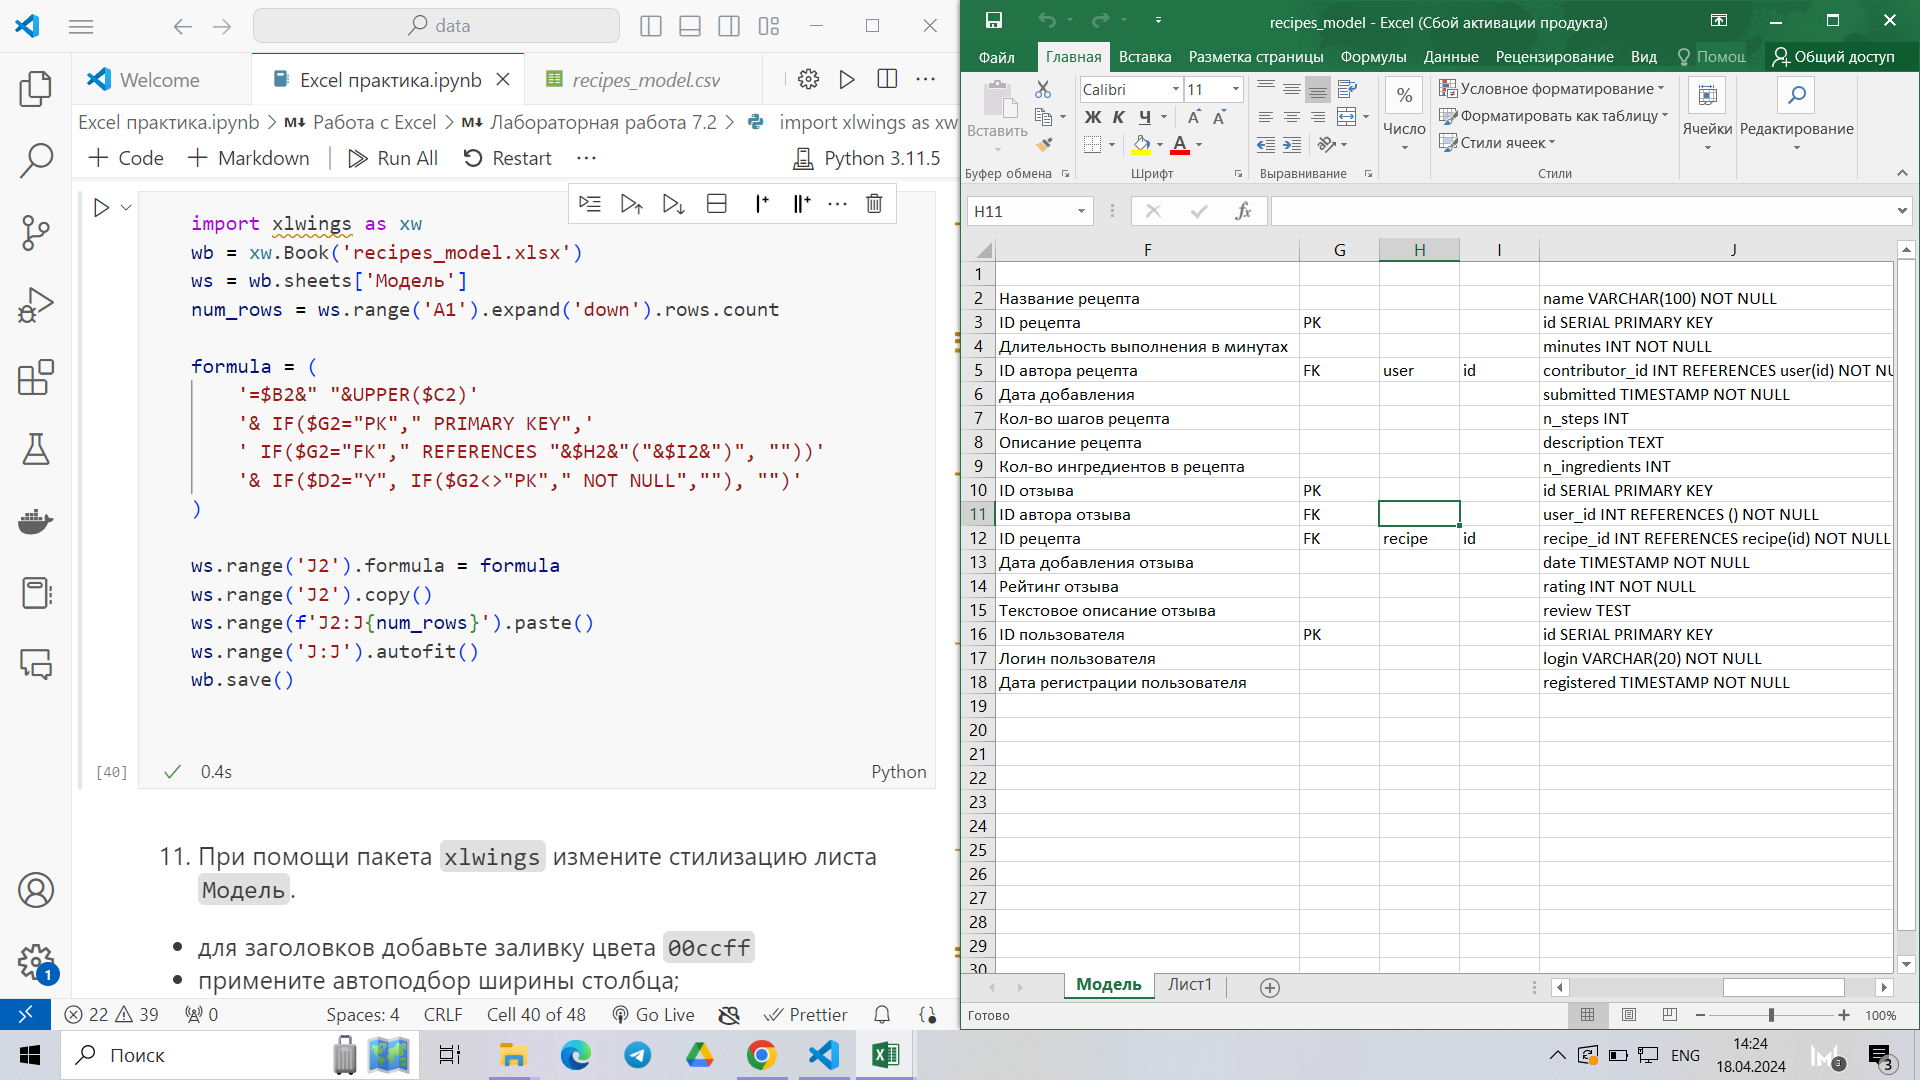

11. При помощи пакета `xlwings` измените стилизацию листа `Модель`.
* для заголовков добавьте заливку цвета `00ccff`
* примените автоподбор ширины столбца;
* сделайте шрифт заголовков полужирным;
* добавьте таблице автофильтр.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [41]:
sht = wb.sheets['Модель']
sht.range('A1:J1').color = ('00ccff') 
sht.range('A:J').autofit()
sht.range('A1:J1').api.Font.Bold = True

sht.range('A1:J1').api.AutoFilter(1)  # Параметр 1- первая строка содержит заголовки

wb.save('recipes.xlsx')

![](таблица_3.png)

12. Посчитайте количество атрибутов для каждой из сущностей. Создайте лист `Статистика` и запишите в него результат группировки, начиная с ячейки "А1". Визуализируйте полученный результат при помощи столбчатой диаграммы. Сохраните полученную визуализацию на лист `Статистика`, начиная с ячейки "E2".  Сделайте скриншот листа `Статистика` и прикрепите в ячейку ноутбука.

* Вы можете воспользоваться методами для визуализации, которые поставляются вместе с объектами `pandas` (см. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot) 

In [ ]:
pip install matplotlib

In [42]:
import matplotlib.pyplot as plt

In [56]:
fig = plt.figure()
plt.bar(data.index, data.values)
plt.xlabel('Таблицы')
plt.ylabel('Количество аттрибутов')

AttributeError: 'list' object has no attribute 'values'

<Figure size 640x480 with 0 Axes>

In [54]:
import pandas as pd
import xlwings as xw
wb = xw.Book('recipes_model.xlsx')
ws = wb.sheets[0]  
data_range = ws.range('A2').expand('table') 
df = data_range.options(pd.DataFrame, header=1).value

statistics = df.groupby(df.columns[0]).size().reset_index(name='Количество атрибутов')
ws_stats = wb.sheets.add('Статистика')
ws_stats.range('A1').value = statistics

chart = ws_stats.charts.add()
chart.set_source_data(ws_stats.range('A1').expand())
chart.chart_type = 'column_clustered'

chart.top = ws_stats.range('E2').top
chart.left = ws_stats.range('E2').left
chart.width = 400
chart.height = 300

wb.save()



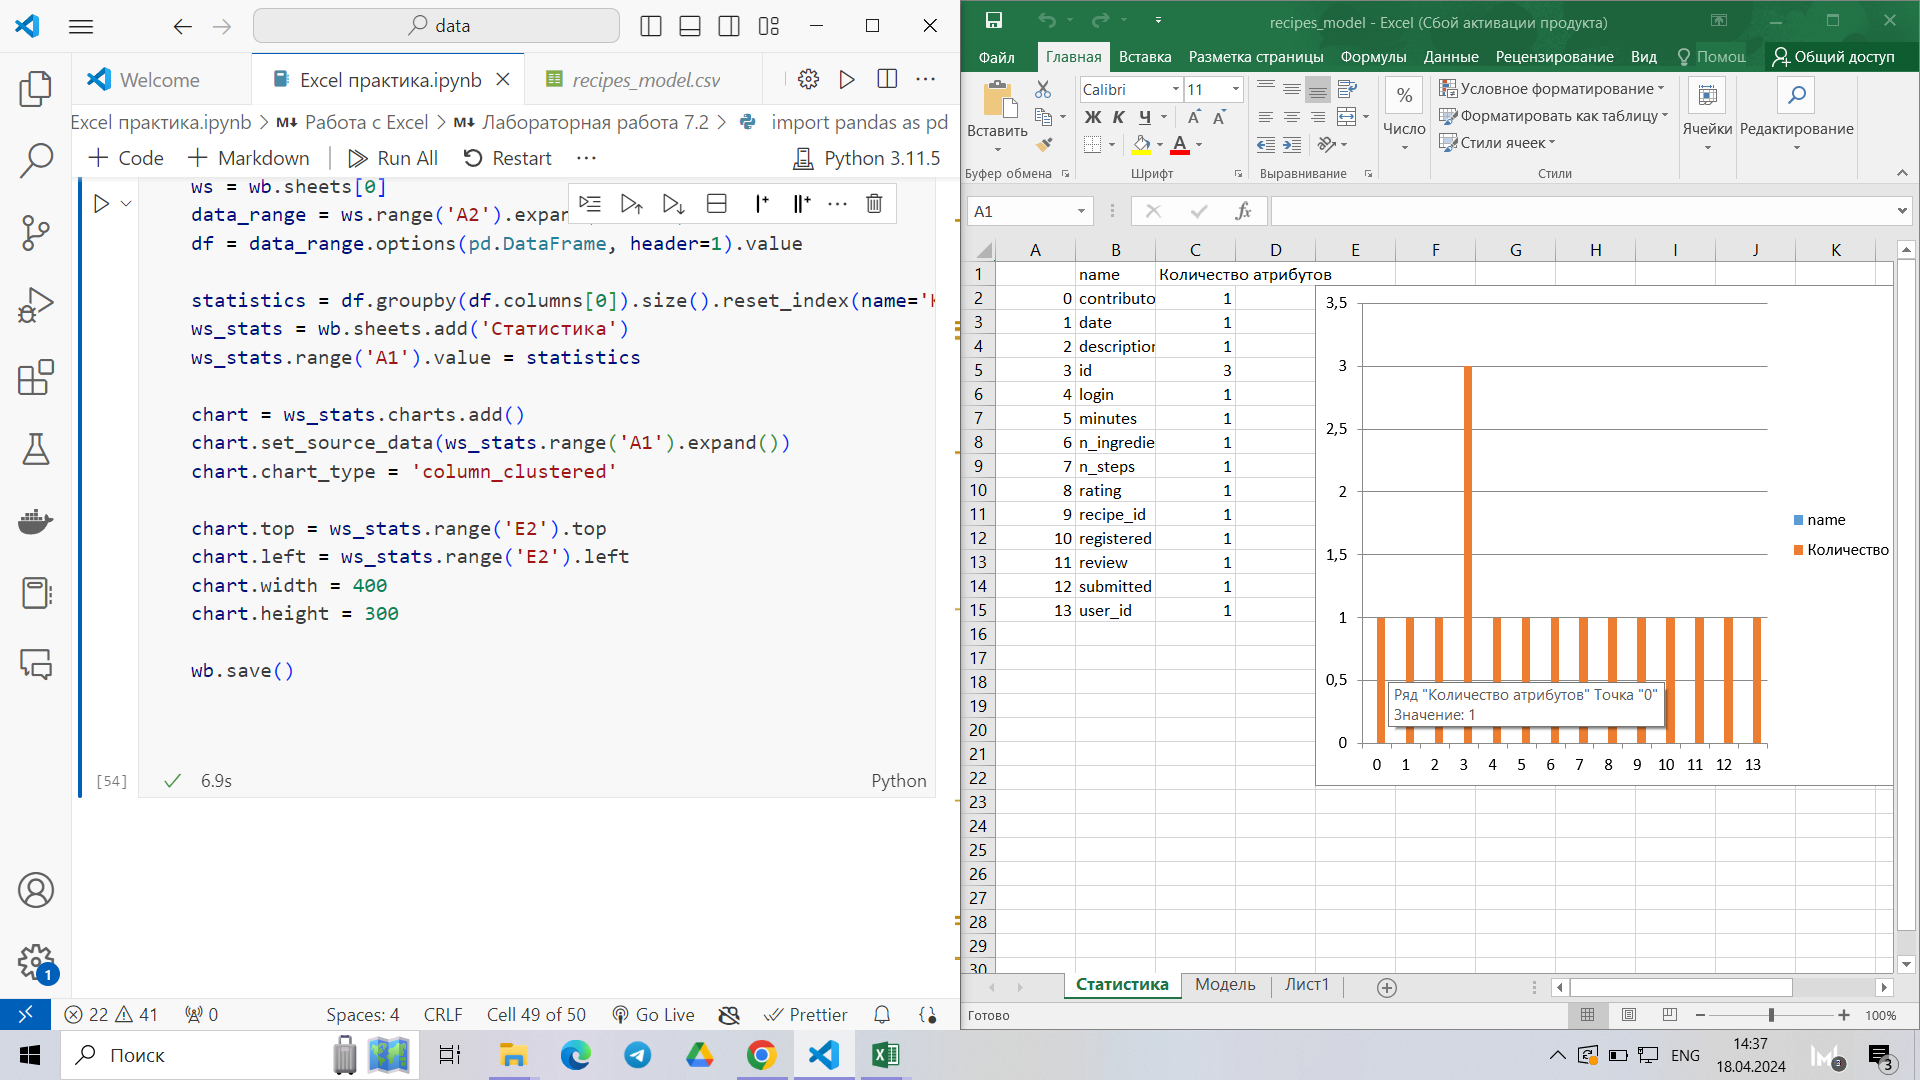

![](./таблица_4.png)